In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("Social_Network_Ads_Dataset.csv")
df.drop(columns=['User ID'], inplace=True)

In [3]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'] )

In [4]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [5]:
df.shape

(400, 4)

In [6]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = df.drop(columns=['Purchased'])
y = df.Purchased

<Axes: xlabel='Age', ylabel='Purchased'>

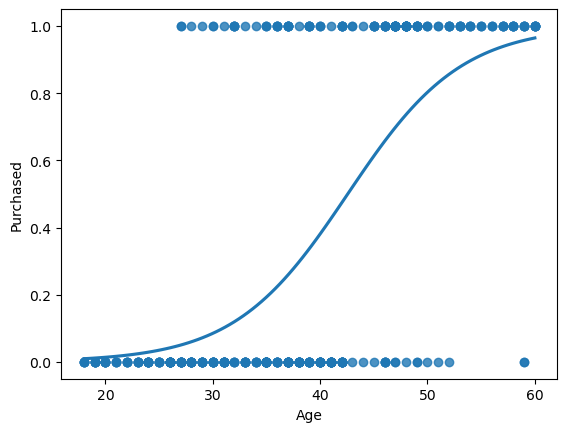

In [8]:
sns.regplot(x=x.Age, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

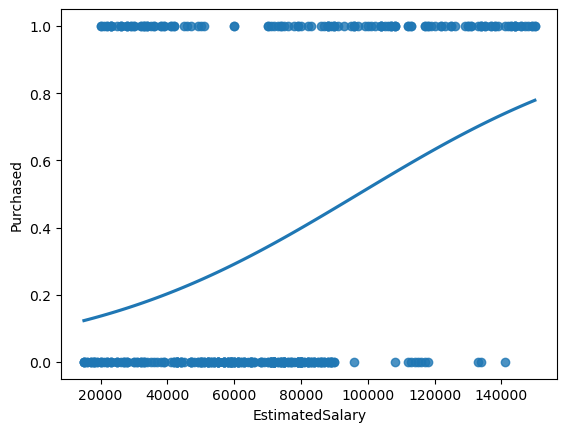

In [9]:
sns.regplot(x=x.EstimatedSalary, y=y, data=df, logistic=True, ci=None)

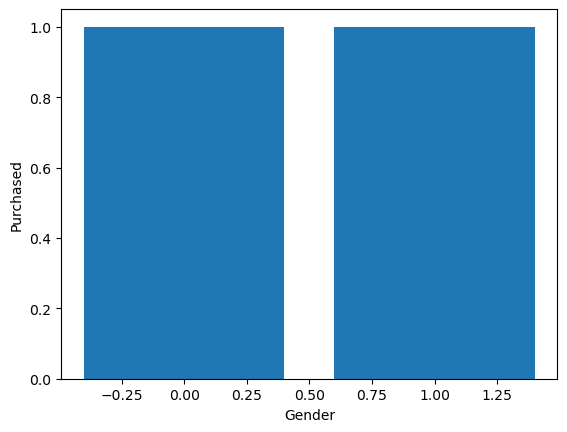

In [10]:
plt.bar(x.Gender, y)
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.show()

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [19]:
data = pd.DataFrame({"Actual Results": Y_test, "Predicted Results": y_pred})

In [21]:
data.head(10)

,Actual Results,Predicted Results
332,0,0
111,0,0
352,1,0
205,0,0
56,0,0
379,1,0
81,0,0
214,0,0
142,0,0
110,0,0


In [15]:
r2 = r2_score(Y_test, y_pred)
mean_error = mean_squared_error(Y_test, y_pred)

In [16]:
print(f'R Square: {r2}')
print(f'Mean Squared Error: {mean_error}')

R Square: -0.5384615384615383
Mean Squared Error: 0.35


In [17]:
model.score(X_train, Y_train)

0.640625

In [18]:
model.score(X_test, Y_test)

0.65